In [135]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [136]:
orgdata = pd.read_csv('Scenic_Spot_C_f.csv')

In [137]:
orgdata.head()

,Id,Name,Zone,Toldescribe,Description,Tel,Add,Zipcode,Region,Town,...,Class3,Level,Website,Parkinginfo,Parkinginfo_Px,Parkinginfo_Py,Ticketinfo,Remarks,Keyword,Changetime
0,C1_313020000G_000026,宏亞食品巧克力觀光工廠,NaN,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...,巧克力共和國是一座以巧克力為主題的觀光工廠，建築設計、館內主題設計皆以巧克力為主題，這裡也提...,886-3-3656555,桃園縣八德市建國路386號,33451.0,桃園市,八德區,...,NaN,9.0,NaN,NaN,121.297187,24.943325,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,桃園，宏亞，巧克力，觀光工廠,2013/7/13 15:00
1,C1_313020000G_000105,台灣金屬創意館,NaN,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,886-6-2036735#245,台南市永康區永科環路598號,71041.0,臺南市,永康區,...,NaN,9.0,NaN,NaN,120.275724,23.045063,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,台南，志鋼，金屬，觀光工廠,2013/7/13 15:00
2,C1_313020000G_000136,臺灣菸酒(股)公司林口觀光酒廠,NaN,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...,林口酒廠為北部地區產能最大、設備最現代化的清酒、紅麴葡萄酒生產工廠。廠內有產品推廣中心，開放...,886-3-3283001#430,桃園縣龜山鄉文化一路55號,333.0,桃園市,龜山區,...,NaN,9.0,http://event.ttl-eshop.com.tw/lk/,NaN,121.375231,25.056168,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,林口，菸酒，酒廠，觀光工廠,2013/7/13 15:00
3,C1_315080500H_000007,水璉、牛山海岸,NaN,水璉位在花蓮縣壽豐鄉海濱，蒼翠的山丘環抱著寬廣的河谷盆地，水璉溪蜿蜒而過，沿著公路邊的小徑往...,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,974.0,花蓮縣,壽豐鄉,...,NaN,NaN,NaN,NaN,NaN,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN,2021/11/4 11:31
4,C1_315080500H_000012,石梯坪,NaN,石梯坪擁有經風力和海水雕刻而成的特殊岩岸風景，潮間帶上豐富的自然生態資源：螃蟹、海星、海參、...,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,977.0,花蓮縣,豐濱鄉,...,NaN,NaN,NaN,NaN,NaN,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN,2022/7/8 13:41


In [138]:
#測試結巴效果
documents = ['我是臺師大科技系林志遠同學']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/林志遠/同學


In [139]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/林志遠/同學


In [140]:
orgdata['seg'] = ""
orgdata.head()

,Id,Name,Zone,Toldescribe,Description,Tel,Add,Zipcode,Region,Town,...,Level,Website,Parkinginfo,Parkinginfo_Px,Parkinginfo_Py,Ticketinfo,Remarks,Keyword,Changetime,seg
0,C1_313020000G_000026,宏亞食品巧克力觀光工廠,NaN,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...,巧克力共和國是一座以巧克力為主題的觀光工廠，建築設計、館內主題設計皆以巧克力為主題，這裡也提...,886-3-3656555,桃園縣八德市建國路386號,33451.0,桃園市,八德區,...,9.0,NaN,NaN,121.297187,24.943325,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,桃園，宏亞，巧克力，觀光工廠,2013/7/13 15:00,
1,C1_313020000G_000105,台灣金屬創意館,NaN,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,886-6-2036735#245,台南市永康區永科環路598號,71041.0,臺南市,永康區,...,9.0,NaN,NaN,120.275724,23.045063,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,台南，志鋼，金屬，觀光工廠,2013/7/13 15:00,
2,C1_313020000G_000136,臺灣菸酒(股)公司林口觀光酒廠,NaN,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...,林口酒廠為北部地區產能最大、設備最現代化的清酒、紅麴葡萄酒生產工廠。廠內有產品推廣中心，開放...,886-3-3283001#430,桃園縣龜山鄉文化一路55號,333.0,桃園市,龜山區,...,9.0,http://event.ttl-eshop.com.tw/lk/,NaN,121.375231,25.056168,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,林口，菸酒，酒廠，觀光工廠,2013/7/13 15:00,
3,C1_315080500H_000007,水璉、牛山海岸,NaN,水璉位在花蓮縣壽豐鄉海濱，蒼翠的山丘環抱著寬廣的河谷盆地，水璉溪蜿蜒而過，沿著公路邊的小徑往...,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,974.0,花蓮縣,壽豐鄉,...,NaN,NaN,NaN,NaN,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN,2021/11/4 11:31,
4,C1_315080500H_000012,石梯坪,NaN,石梯坪擁有經風力和海水雕刻而成的特殊岩岸風景，潮間帶上豐富的自然生態資源：螃蟹、海星、海參、...,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,977.0,花蓮縣,豐濱鄉,...,NaN,NaN,NaN,NaN,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN,2022/7/8 13:41,


In [141]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['Toldescribe']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\User\AppData\Local\Temp\ipykernel_18812\2441836659.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
orgdata['seg']

0       [巧克力, 展場, 觀光, 工廠, 建築, 設計, 相關, 宏亞, 為主題, 列物, 觀及,...
1       [金屬, 進行, 觀光, 工廠, 銲接, 台灣, 志鋼, 創意館, 創意, 為志, 鋼金屬,...
2       [酒廠, 清酒, 民國, 生產, 林口, 觀光, 園區, 台塑, 葡萄酒, 歷史, 產品, ...
3       [海灘, 牛山, 海岸, 水璉, 沙灘, 生態, 豐富, 選擇, 台灣, 保護區, 聲音, ...
4       [石梯, 生態, 海蝕, 豐富, 潮間, 魚群, 露營區, 賞鯨, 珊瑚礁, 海岸, 平台,...
                              ...                        
5673    [溪州, 農用, 書店, 旅社, 地方, 荒棄, 老建築, 只承載, 回憶, 列著, 相關,...
5674    [逸品, 大陸書店, 展售, 音樂書籍, 鋼琴, 各種, 樂器, 學程, 及樂譜, 手作, ...
5675    [書籍, 日文, 創立, 1936, 專門, 經營, 雜誌, 各種, 日語, 學習, 台日關...
5676    [書店, 舉辦, 不定期, 英文, 露比, 一間, 社區型, 內書籍, 兒童, 繪本, 並且...
5677    [聯經, 出版, 新生南路, 門市, 不過, 並不, 一樓, 聯經書房, 書籍, 類為, 店...
Name: seg, Length: 5678, dtype: object

In [143]:
date_split = orgdata['Changetime'].iloc[0].split('/')

In [144]:
date_split[0]

'2013'

In [145]:
orgdata['year'] = ""
index = 0
for documents in orgdata['Changetime']:
    date_split = documents.split('/')
    orgdata['year'].iloc[index] = date_split[0]
    index += 1

#底下會error的原因我去查是因為我找到的資料中有幾筆可能是NaN，所以部分資料可能會讀不到所產生的錯誤

C:\Users\User\AppData\Local\Temp\ipykernel_18812\3393200716.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AttributeError: 'float' object has no attribute 'split'

In [146]:
orgdata.head()

,Id,Name,Zone,Toldescribe,Description,Tel,Add,Zipcode,Region,Town,...,Website,Parkinginfo,Parkinginfo_Px,Parkinginfo_Py,Ticketinfo,Remarks,Keyword,Changetime,seg,year
0,C1_313020000G_000026,宏亞食品巧克力觀光工廠,NaN,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...,巧克力共和國是一座以巧克力為主題的觀光工廠，建築設計、館內主題設計皆以巧克力為主題，這裡也提...,886-3-3656555,桃園縣八德市建國路386號,33451.0,桃園市,八德區,...,NaN,NaN,121.297187,24.943325,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,桃園，宏亞，巧克力，觀光工廠,2013/7/13 15:00,"[巧克力, 展場, 觀光, 工廠, 建築, 設計, 相關, 宏亞, 為主題, 列物, 觀及,...",2013
1,C1_313020000G_000105,台灣金屬創意館,NaN,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...,886-6-2036735#245,台南市永康區永科環路598號,71041.0,臺南市,永康區,...,NaN,NaN,120.275724,23.045063,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,台南，志鋼，金屬，觀光工廠,2013/7/13 15:00,"[金屬, 進行, 觀光, 工廠, 銲接, 台灣, 志鋼, 創意館, 創意, 為志, 鋼金屬,...",2013
2,C1_313020000G_000136,臺灣菸酒(股)公司林口觀光酒廠,NaN,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...,林口酒廠為北部地區產能最大、設備最現代化的清酒、紅麴葡萄酒生產工廠。廠內有產品推廣中心，開放...,886-3-3283001#430,桃園縣龜山鄉文化一路55號,333.0,桃園市,龜山區,...,http://event.ttl-eshop.com.tw/lk/,NaN,121.375231,25.056168,收費方式請電洽,詳細參觀訊息請逕洽廠商網站說明,林口，菸酒，酒廠，觀光工廠,2013/7/13 15:00,"[酒廠, 清酒, 民國, 生產, 林口, 觀光, 園區, 台塑, 葡萄酒, 歷史, 產品, ...",2013
3,C1_315080500H_000007,水璉、牛山海岸,NaN,水璉位在花蓮縣壽豐鄉海濱，蒼翠的山丘環抱著寬廣的河谷盆地，水璉溪蜿蜒而過，沿著公路邊的小徑往...,"水璉位在花蓮縣壽豐鄉海濱，為阿美族世居之地，早在3,500年前即有繩紋陶文化之先民居住於此。...",886-3-8601400,花蓮縣974壽豐鄉牛山39之5號,974.0,花蓮縣,壽豐鄉,...,NaN,NaN,NaN,NaN,牛山呼庭園區需付50元門票，可抵用飲品。,東海岸的石頭雖美，但請切勿撿取。走米棧古道，記得帶瓶水解渴。,NaN,2021/11/4 11:31,"[海灘, 牛山, 海岸, 水璉, 沙灘, 生態, 豐富, 選擇, 台灣, 保護區, 聲音, ...",2021
4,C1_315080500H_000012,石梯坪,NaN,石梯坪擁有經風力和海水雕刻而成的特殊岩岸風景，潮間帶上豐富的自然生態資源：螃蟹、海星、海參、...,石梯坪位在花蓮縣豐濱鄉石梯灣的南側，整個區域是一個面積極大的海岸階地，海蝕地形十分發達，海蝕...,886-3-8781452,花蓮縣977豐濱鄉石梯坪52號,977.0,花蓮縣,豐濱鄉,...,NaN,NaN,NaN,NaN,大型車：假日200元、非假日170元小型車：假日60元、非假日50元機車：假日20元、非假日15元,1.石梯坪沒有遮陽設施，海邊日照強，要做好防曬；裝備也要齊全，除了遮陽的帽子、長褲、長袖，解...,NaN,2022/7/8 13:41,"[石梯, 生態, 海蝕, 豐富, 潮間, 魚群, 露營區, 賞鯨, 珊瑚礁, 海岸, 平台,...",2022


In [147]:
Counter(orgdata['year']).keys()

dict_keys(['2013', '2021', '2022', '2019', '2016', '2020', '2017', '2018', '2014', '2012', '2015', '2011', ''])

In [148]:
words = list(orgdata['Region'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [149]:
df = [show_key, show_values]

In [150]:
result = pd.concat(df, axis=1)
result.columns = ['Region', 'freguency']
result

,Region,freguency
0,桃園市,264
1,臺南市,488
2,花蓮縣,145
3,臺東縣,272
4,NaN,70
5,澎湖縣,269
6,屏東縣,295
7,連江縣,85
8,南投縣,280
9,苗栗縣,182


In [151]:
import plotly.express as px
import pandas as pd

px.bar(result, x='Region', y='freguency', title='judge term from 2011 to 2022')

In [152]:
show_sub = orgdata['Region']=='新北市'
subdata = orgdata[show_sub]
subdata

,Id,Name,Zone,Toldescribe,Description,Tel,Add,Zipcode,Region,Town,...,Website,Parkinginfo,Parkinginfo_Px,Parkinginfo_Py,Ticketinfo,Remarks,Keyword,Changetime,seg,year
632,C1_315081500H_000009,福德水車公園生態園區,NaN,2006年3月11日開幕的福德水車園區，是三芝水車文化景觀中最大的水車園區，座落於三芝區鬧區...,NaN,886-2-86353640,新北市三芝區三芝遊客中心旁(三芝遊客中心地址:臺北縣三芝區埔坪里埔頭坑164-2號),NaN,新北市,三芝區,...,https://www.northguan-nsa.gov.tw/user/Article....,NaN,NaN,NaN,NaN,NaN,"北海岸及觀音山國家風景區入口網, 觀光資訊網, 魅力景點, 三芝鄉, test",2012/6/26 09:27,"[水車, 三芝, 園區, 景觀, 一格, 引水道, 2006, 11, 開幕, 福德水車, ...",2012
633,C1_315081500H_000013,麟山鼻遊憩區,NaN,與富貴角相對望，矗立白沙灣兩旁，由於八十萬年前大屯火山群的竹子火山爆發，而形成了向外海延伸的...,NaN,886-2-86355100,新北市石門區德茂里下員坑(2號省道23公里處),NaN,新北市,石門區,...,https://www.northguan-nsa.gov.tw/user/Article....,NaN,NaN,NaN,NaN,NaN,麟山鼻觀海步道,2012/6/26 09:05,"[安山岩, 稱為, 麟山, 景觀, 隨著, 改變, 藻礁, 藻類, 生長, 鼻遊, 憩區, ...",2012
634,C1_315081500H_000014,白沙灣水域遊憩區,NaN,白沙灣(台2線23公里處)是由麟山鼻與富貴角共同合抱而成的半月形天然海灣，綿延的白淨沙灘長約...,NaN,886-2-86355100,新北市石門區德茂里下員坑(2號省道23公里處),NaN,新北市,石門區,...,https://www.northguan-nsa.gov.tw/user/Article....,NaN,NaN,NaN,NaN,NaN,白沙灣,2012/6/26 09:06,"[沙灘, 還有, 生態, 旅遊, 漫步, 白沙, 沙地, 依循, 予人, 公里, 23, 由...",2012
635,C1_315081500H_000015,白沙灣遊客中心,NaN,位於白沙灣入口旁的北海岸及觀音山國家風景區管理處，設有白沙灣遊客中心，於2002年正式成立，...,NaN,886-2-86355100,新北市石門區德茂里下員坑33-6號,NaN,新北市,石門區,...,https://www.northguan-nsa.gov.tw/user/Article....,NaN,NaN,NaN,NaN,NaN,"北海岸及觀音山國家風景區入口網, 觀光資訊網, 魅力景點, 石門鄉, 北海岸及觀音山國家風景...",2012/6/26 09:07,"[建築, 北海岸, 風景區, 活動, 遊客, 白沙, 觀音, 山國家, 設有, 灣遊客, 2...",2012
636,C1_315081500H_000016,富貴角遊憩區,NaN,舊名為「打賓」或「打鞭」的富貴角，於清乾隆27年(西元1762年)，荷蘭人法倫泰在其著作《新...,NaN,886-2-86355100,新北市石門區富基里（2號省道25公里處，往富基漁港內進入）,NaN,新北市,石門區,...,https://www.northguan-nsa.gov.tw/user/Article....,NaN,NaN,NaN,NaN,NaN,富貴角公園,2012/6/26 09:09,"[富貴角, 迎風, 剪樹, 強風, 無法, 生長, 枝葉, 沙丘, 舊名, 打賓, 打鞭, ...",2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,C1_382000000A_403523,三芝遊客中心及名人文物館,NaN,三芝遊客中心位於群山環繞的山坡地上，全區視野遼闊，除了提供遊客舒適寬敞的休憩空間，也可進行旅...,三芝遊客中心位於群山環繞的山坡地上，全區視野遼闊，除了提供遊客舒適寬敞的休憩空間，也可進行旅...,886-2-86355143,新北市252三芝區埔坪里埔頭坑164-2號,252.0,新北市,三芝區,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/10/20 13:53,"[三芝, 遊客, 生平, 名人, 江文, 環繞, 全區, 視野, 遼闊, 舒適, 空間, 可...",2022
5659,C1_A25000000E_100006,小小書房,NaN,成立於永和區，以分享和累積為核心價值。原本位於竹林路巷內，2008年搬遷至溪洲市場附近，因土...,NaN,886-2-29231925,新北市 永和區(永和市)文化路192巷4弄2-1號,234.0,新北市,永和區,...,https://smallbooks.com.tw/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[各種, 藝文, 活動, 分享, 累積, 價值, 竹林路, 巷內, 2008, 至溪洲, 市...",
5660,C1_A25000000E_100007,有河book,NaN,座落於淡水河岸，捷運站與渡船頭之間，由686和隱匿於2006年底開設。店主一位是詩人，一位是...,NaN,886-2-26252459,新北市 淡水區(淡水鎮)中正路5巷26號2樓,251.0,新北市,淡水區,...,http://blog.roodo.com/book686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[電影, 詩集, 文學, 討論會, 店主, 捷運站, 頭之間, 686, 隱匿, 2006,...",
5667,C1_A25000000E_100019,心波力簡單書店,NaN,書店的負責人是位詩人，也是說故事訓練師，因而店內陳列許多童書、繪本與心靈成長的書籍，也有二手...,NaN,886-2-26257956,新北市 淡水區(淡水鎮)重建街28號,251.0,新北市,淡水區,...,http://newpoly.pixnet.net/blog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[繪本, 心靈, 故事, 書店, 負責人, 詩人, 訓練師, 內陳列, 許多童, 成長, 書...",


In [153]:
type(subdata['seg'])

pandas.core.series.Series

In [154]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [155]:
subdata_seg_list

[['水車',
  '三芝',
  '園區',
  '景觀',
  '一格',
  '引水道',
  '2006',
  '11',
  '開幕',
  '福德水車',
  '區鬧區',
  '南側',
  '遊客',
  '對面',
  '地近',
  '0.6',
  '公頃',
  '沿著',
  '環園步',
  '有以',
  '給水以',
  '帶動',
  '運行',
  '引導式',
  '木造',
  '還有',
  '用來',
  '維護',
  '乾淨',
  '沉砂池',
  '欣賞',
  '多樣化',
  '隨著',
  '風情',
  '繽紛',
  '紅色景',
  '觀橋',
  '一覽八連溪',
  '兩岸',
  '風光',
  '此處',
  '結合',
  '觀光',
  '生態',
  '三大主題',
  '不僅',
  '鳥野間',
  '純淨',
  '氣息',
  '周圍',
  '所視',
  '綠意',
  '處處',
  '生機',
  '如藝術',
  '品般',
  '造景',
  '靜靜',
  '緩慢',
  '順水',
  '轉動',
  '不僅訴',
  '農業',
  '發展',
  '歷程',
  '痕跡',
  '靜謐',
  '氛圍',
  '舞弄',
  '座落',
  '知性',
  '高架',
  '盈盈',
  '散落',
  '穿越',
  '山林',
  '四季',
  '水源',
  '即可',
  '空中',
  '享受',
  '一份',
  '一座',
  '早期',
  '健康',
  '之外',
  '更是',
  '植物',
  '各地',
  '大型',
  '除了',
  '文化',
  '中心',
  '最大',
  '可以'],
 ['安山岩',
  '稱為',
  '麟山',
  '景觀',
  '隨著',
  '改變',
  '藻礁',
  '藻類',
  '生長',
  '鼻遊',
  '憩區',
  '木棧',
  '火山',
  '岩石',
  '地形',
  '形成',
  '弄潮',
  '深黑色',
  '富貴角',
  '相對望',
  '灣兩旁',
  '爆發',
  '德茂里',
  '鼻尾',
  '鼻尾頭',
  '日治',
  '

In [156]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [157]:
diction.keys()

dict_keys(['水車', '三芝', '園區', '景觀', '一格', '引水道', '2006', '11', '開幕', '福德水車', '區鬧區', '南側', '遊客', '對面', '地近', '0.6', '公頃', '沿著', '環園步', '有以', '給水以', '帶動', '運行', '引導式', '木造', '還有', '用來', '維護', '乾淨', '沉砂池', '欣賞', '多樣化', '隨著', '風情', '繽紛', '紅色景', '觀橋', '一覽八連溪', '兩岸', '風光', '此處', '結合', '觀光', '生態', '三大主題', '不僅', '鳥野間', '純淨', '氣息', '周圍', '所視', '綠意', '處處', '生機', '如藝術', '品般', '造景', '靜靜', '緩慢', '順水', '轉動', '不僅訴', '農業', '發展', '歷程', '痕跡', '靜謐', '氛圍', '舞弄', '座落', '知性', '高架', '盈盈', '散落', '穿越', '山林', '四季', '水源', '即可', '空中', '享受', '一份', '一座', '早期', '健康', '之外', '更是', '植物', '各地', '大型', '除了', '文化', '中心', '最大', '可以', '安山岩', '稱為', '麟山', '改變', '藻礁', '藻類', '生長', '鼻遊', '憩區', '木棧', '火山', '岩石', '地形', '形成', '弄潮', '深黑色', '富貴角', '相對望', '灣兩旁', '爆發', '德茂里', '鼻尾', '鼻尾頭', '日治', '時期', '遺跡', '所構', '區域', '質地', '堅硬', '則是麟山', '鼻步', '節理', '發達', '經年', '侵蝕', '東北季', '風長', '不斷', '挾帶', '吹襲', '磨蝕', '逐漸', '風蝕面', '然後再', '風向', '帶來', '擁有', '尖銳', '佇足', '這些', '體積', '碩大且', '石時', '驚訝', '至終', '堅持', '另堪稱', '為麟山', '--', '一個', '進行', '觀察', '條件',

In [158]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [159]:
import numpy as np

In [162]:
mask = np.array(Image.open("picture.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [163]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

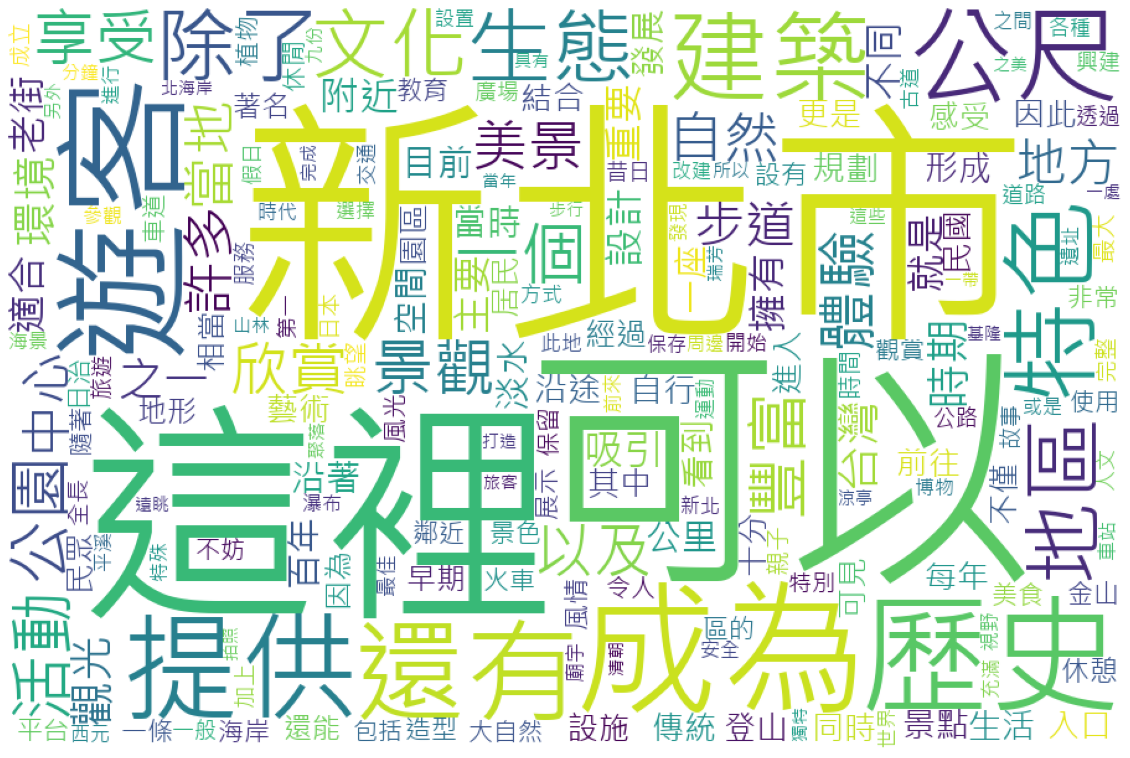

In [164]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()